In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing

from sklearn import metrics


In [2]:
tcas = pd.read_csv('tcas14.csv')
tcas.head()

,Unnamed: 0,AcademicYear,PrefixName,Sex,FacultyName,DepartmentName,MajorName,EntryTypeName,TCAS,StudentType,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Status,GPAX
0,0,2562,MISS,Female,School of Liberal Arts,Thai Language and Culture for Foreigners,English,FOREIGNER,5,FOREIGN,3.281981,2.826382,3.004571,3.45754,MFU student,3.241106
1,1,2562,MISS,Female,School of Liberal Arts,English,English,QUOTA 17 NORTHERN PROVINCES,2,THAI,3.940000,3.330000,3.410000,3.86000,MFU student,3.610000
2,2,2562,MR.,Male,School of Liberal Arts,English,English,QUOTA 17 NORTHERN PROVINCES,2,THAI,3.750000,2.300000,1.750000,2.82000,MFU student,3.040000
3,3,2562,MISS,Female,School of Liberal Arts,English,English,DIRECT ADMISSION BY SCHOOL,1,THAI,4.000000,3.680000,3.910000,4.00000,MFU student,3.920000
4,4,2562,MISS,Female,School of Liberal Arts,English,English,DIRECT ADMISSION BY SCHOOL,1,THAI,3.910000,2.360000,3.250000,3.67000,MFU student,3.460000


In [3]:
tcas.dtypes

Unnamed: 0          int64
AcademicYear        int64
PrefixName         object
Sex                object
FacultyName        object
DepartmentName     object
MajorName          object
EntryTypeName      object
TCAS                int64
StudentType        object
GPA_Eng           float64
GPA_Math          float64
GPA_Sci           float64
GPA_Sco           float64
Status             object
GPAX              float64
dtype: object

In [4]:
tcas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16755 entries, 0 to 16754
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      16755 non-null  int64  
 1   AcademicYear    16755 non-null  int64  
 2   PrefixName      16755 non-null  object 
 3   Sex             16755 non-null  object 
 4   FacultyName     16755 non-null  object 
 5   DepartmentName  16755 non-null  object 
 6   MajorName       16755 non-null  object 
 7   EntryTypeName   16755 non-null  object 
 8   TCAS            16755 non-null  int64  
 9   StudentType     16755 non-null  object 
 10  GPA_Eng         16755 non-null  float64
 11  GPA_Math        16755 non-null  float64
 12  GPA_Sci         16755 non-null  float64
 13  GPA_Sco         16755 non-null  float64
 14  Status          16755 non-null  object 
 15  GPAX            16755 non-null  float64
dtypes: float64(5), int64(3), object(8)
memory usage: 2.0+ MB


In [5]:
tcas.describe()

,Unnamed: 0,AcademicYear,TCAS,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX
count,16755.000000,16755.000000,16755.000000,16755.000000,16755.000000,16755.000000,16755.000000,16755.000000
mean,8377.000000,2562.521755,2.188183,3.261182,2.790954,2.977449,3.443822,3.224194
std,4836.896216,0.499541,1.471419,0.565132,0.751172,0.606255,0.457308,0.450611
min,0.000000,2562.000000,1.000000,0.750000,0.450000,0.620000,0.700000,1.180000
25%,4188.500000,2562.000000,1.000000,2.900000,2.220000,2.560000,3.180000,2.920000
50%,8377.000000,2563.000000,2.000000,3.360000,2.800000,3.000000,3.540000,3.260000
75%,12565.500000,2563.000000,2.000000,3.730000,3.410000,3.470000,3.810000,3.580000
max,16754.000000,2563.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [6]:
tcas.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16750    False
16751    False
16752    False
16753    False
16754    False
Length: 16755, dtype: bool

In [7]:
tcas.describe(include='all')

,Unnamed: 0,AcademicYear,PrefixName,Sex,FacultyName,DepartmentName,MajorName,EntryTypeName,TCAS,StudentType,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Status,GPAX
count,16755.000000,16755.000000,16755,16755,16755,16755,16755,16755,16755.000000,16755,16755.000000,16755.000000,16755.000000,16755.000000,16755,16755.000000
unique,NaN,NaN,3,2,14,39,4,15,NaN,2,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,MISS,Female,School of Management,Laws,English,QUOTA BY SCHOOL,NaN,THAI,NaN,NaN,NaN,NaN,Not MFU student,NaN
freq,NaN,NaN,12334,12370,5044,1666,15475,4983,NaN,16753,NaN,NaN,NaN,NaN,11185,NaN
mean,8377.000000,2562.521755,NaN,NaN,NaN,NaN,NaN,NaN,2.188183,NaN,3.261182,2.790954,2.977449,3.443822,NaN,3.224194
std,4836.896216,0.499541,NaN,NaN,NaN,NaN,NaN,NaN,1.471419,NaN,0.565132,0.751172,0.606255,0.457308,NaN,0.450611
min,0.000000,2562.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.750000,0.450000,0.620000,0.700000,NaN,1.180000
25%,4188.500000,2562.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.900000,2.220000,2.560000,3.180000,NaN,2.920000
50%,8377.000000,2563.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,3.360000,2.800000,3.000000,3.540000,NaN,3.260000
75%,12565.500000,2563.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,3.730000,3.410000,3.470000,3.810000,NaN,3.580000


In [8]:
tcas.isnull().sum()

Unnamed: 0        0
AcademicYear      0
PrefixName        0
Sex               0
FacultyName       0
DepartmentName    0
MajorName         0
EntryTypeName     0
TCAS              0
StudentType       0
GPA_Eng           0
GPA_Math          0
GPA_Sci           0
GPA_Sco           0
Status            0
GPAX              0
dtype: int64

In [9]:
cat_tcas = tcas[['FacultyName','MajorName']]
num_tcas = tcas[['GPA_Eng','GPA_Math','GPA_Sci','GPA_Sco','GPAX']]
class_tcas = tcas[['Status']]

#Changing categorical to numeric
faculty_name={'School of Liberal Arts':1, 'School of Science':2,
       'School of Management':3, 'School of Information Technology':4,
       'School of Agro-industry':5, 'School of Law':6,
       'School of Cosmetic Science':7, 'School of Health Science':8,
       'School of Nursing':9, 'School of Medicine':10, 'School of Dentistry':11,
       'School of Social Innovation':12, 'School of Sinology':13,
       'School of Integrative Medicine':14}
faculty_n=cat_tcas.FacultyName.apply(faculty_name.get)
faculty_n

#Nominal to numeric
Major_Name = cat_tcas['MajorName']
Major_Name = pd.get_dummies(Major_Name)
Major_Name

tcas2 = pd.concat([num_tcas, faculty_n, Major_Name], axis=1)
tcas2

,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX,FacultyName,Aviation Operations,Aviation Services,English,International Aviation Logistics Business
0,3.281981,2.826382,3.004571,3.45754,3.241106,1,0,0,1,0
1,3.940000,3.330000,3.410000,3.86000,3.610000,1,0,0,1,0
2,3.750000,2.300000,1.750000,2.82000,3.040000,1,0,0,1,0
3,4.000000,3.680000,3.910000,4.00000,3.920000,1,0,0,1,0
4,3.910000,2.360000,3.250000,3.67000,3.460000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
16750,2.460000,1.410000,2.750000,3.01000,2.680000,3,0,0,1,0
16751,2.000000,2.170000,2.550000,2.78000,2.900000,5,0,0,1,0
16752,2.410000,1.830000,2.280000,3.19000,2.640000,3,0,0,1,0
16753,2.500000,1.500000,1.000000,2.50000,2.960000,3,0,0,1,0


In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
norm_tcas = mms.fit_transform(tcas2)
norm_tcas = pd.DataFrame(norm_tcas, columns=tcas2.columns) 
norm_tcas

,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX,FacultyName,Aviation Operations,Aviation Services,English,International Aviation Logistics Business
0,0.779071,0.669403,0.705494,0.835618,0.730889,0.000000,0.0,0.0,1.0,0.0
1,0.981538,0.811268,0.825444,0.957576,0.861702,0.000000,0.0,0.0,1.0,0.0
2,0.923077,0.521127,0.334320,0.642424,0.659574,0.000000,0.0,0.0,1.0,0.0
3,1.000000,0.909859,0.973373,1.000000,0.971631,0.000000,0.0,0.0,1.0,0.0
4,0.972308,0.538028,0.778107,0.900000,0.808511,0.000000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16750,0.526154,0.270423,0.630178,0.700000,0.531915,0.153846,0.0,0.0,1.0,0.0
16751,0.384615,0.484507,0.571006,0.630303,0.609929,0.307692,0.0,0.0,1.0,0.0
16752,0.510769,0.388732,0.491124,0.754545,0.517730,0.153846,0.0,0.0,1.0,0.0
16753,0.538462,0.295775,0.112426,0.545455,0.631206,0.153846,0.0,0.0,1.0,0.0


In [11]:
tcas3 = pd.concat([tcas2,class_tcas], axis=1)
tcas3

,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX,FacultyName,Aviation Operations,Aviation Services,English,International Aviation Logistics Business,Status
0,3.281981,2.826382,3.004571,3.45754,3.241106,1,0,0,1,0,MFU student
1,3.940000,3.330000,3.410000,3.86000,3.610000,1,0,0,1,0,MFU student
2,3.750000,2.300000,1.750000,2.82000,3.040000,1,0,0,1,0,MFU student
3,4.000000,3.680000,3.910000,4.00000,3.920000,1,0,0,1,0,MFU student
4,3.910000,2.360000,3.250000,3.67000,3.460000,1,0,0,1,0,MFU student
...,...,...,...,...,...,...,...,...,...,...,...
16750,2.460000,1.410000,2.750000,3.01000,2.680000,3,0,0,1,0,Not MFU student
16751,2.000000,2.170000,2.550000,2.78000,2.900000,5,0,0,1,0,Not MFU student
16752,2.410000,1.830000,2.280000,3.19000,2.640000,3,0,0,1,0,Not MFU student
16753,2.500000,1.500000,1.000000,2.50000,2.960000,3,0,0,1,0,Not MFU student


In [12]:
# get all numberic features
num_tcas1 = tcas3.select_dtypes(include=['number']) 
# get all nominal / ordinal / Boolean features
cat_tcas1 = tcas3[['Status']]
# get class
class_tcas1 = tcas3.FacultyName

In [13]:
num_tcas1.head()

,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX,FacultyName,Aviation Operations,Aviation Services,English,International Aviation Logistics Business
0,3.281981,2.826382,3.004571,3.45754,3.241106,1,0,0,1,0
1,3.940000,3.330000,3.410000,3.86000,3.610000,1,0,0,1,0
2,3.750000,2.300000,1.750000,2.82000,3.040000,1,0,0,1,0
3,4.000000,3.680000,3.910000,4.00000,3.920000,1,0,0,1,0
4,3.910000,2.360000,3.250000,3.67000,3.460000,1,0,0,1,0


In [14]:
cat_tcas1.head()

,Status
0,MFU student
1,MFU student
2,MFU student
3,MFU student
4,MFU student


In [15]:
cat_data1 = pd.get_dummies(cat_tcas1)
cat_data1

,Status_MFU student,Status_Not MFU student
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
16750,0,1
16751,0,1
16752,0,1
16753,0,1


In [16]:
k_catnum = pd.concat([num_tcas1, cat_data1], axis=1)
k_catnum.head()

,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX,FacultyName,Aviation Operations,Aviation Services,English,International Aviation Logistics Business,Status_MFU student,Status_Not MFU student
0,3.281981,2.826382,3.004571,3.45754,3.241106,1,0,0,1,0,1,0
1,3.940000,3.330000,3.410000,3.86000,3.610000,1,0,0,1,0,1,0
2,3.750000,2.300000,1.750000,2.82000,3.040000,1,0,0,1,0,1,0
3,4.000000,3.680000,3.910000,4.00000,3.920000,1,0,0,1,0,1,0
4,3.910000,2.360000,3.250000,3.67000,3.460000,1,0,0,1,0,1,0


In [17]:
class_tcas2 = tcas3["Status"]

In [18]:
X = k_catnum
Y = class_tcas2
X

,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX,FacultyName,Aviation Operations,Aviation Services,English,International Aviation Logistics Business,Status_MFU student,Status_Not MFU student
0,3.281981,2.826382,3.004571,3.45754,3.241106,1,0,0,1,0,1,0
1,3.940000,3.330000,3.410000,3.86000,3.610000,1,0,0,1,0,1,0
2,3.750000,2.300000,1.750000,2.82000,3.040000,1,0,0,1,0,1,0
3,4.000000,3.680000,3.910000,4.00000,3.920000,1,0,0,1,0,1,0
4,3.910000,2.360000,3.250000,3.67000,3.460000,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16750,2.460000,1.410000,2.750000,3.01000,2.680000,3,0,0,1,0,0,1
16751,2.000000,2.170000,2.550000,2.78000,2.900000,5,0,0,1,0,0,1
16752,2.410000,1.830000,2.280000,3.19000,2.640000,3,0,0,1,0,0,1
16753,2.500000,1.500000,1.000000,2.50000,2.960000,3,0,0,1,0,0,1


In [19]:
Y

0            MFU student
1            MFU student
2            MFU student
3            MFU student
4            MFU student
              ...       
16750    Not MFU student
16751    Not MFU student
16752    Not MFU student
16753    Not MFU student
16754    Not MFU student
Name: Status, Length: 16755, dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)

Training Accuracy:  1.0


In [22]:
from sklearn.model_selection import train_test_split
# Split training set and test set with ration 70% : 30% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (11728, 12)
y_train shape:  (11728,)
x_test shape:  (5027, 12)
y_test shape:  (5027,)


In [23]:
Y.value_counts()

Not MFU student    11185
MFU student         5570
Name: Status, dtype: int64

In [24]:
y_train.value_counts()

Not MFU student    7829
MFU student        3899
Name: Status, dtype: int64

In [25]:
y_train.value_counts()

Not MFU student    7829
MFU student        3899
Name: Status, dtype: int64

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)

Tesing Accuracy:  1.0


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=2 
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Cross Validation Accuracy: 1.000 +/- 0.000


In [28]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,30))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 1.0
2 1.0
3 0.9998806682577566
4 0.9998806682577566
5 0.9998806682577566
6 0.9998806682577566
7 0.999821002386635
8 0.9998806682577566
9 0.9998806682577566
10 0.9999403341288783
11 0.999821002386635
12 0.999821002386635
13 0.999821002386635
14 0.999821002386635
15 0.9997613365155132
16 0.999821002386635
17 0.9997613365155132
18 0.999821002386635
19 0.9997613365155132
20 0.9997613365155132
21 0.9997613365155132
22 0.999821002386635
23 0.9997613365155132
24 0.9997613365155132
25 0.9997016706443913
26 0.9997016706443913
27 0.9997016706443913
28 0.9997016706443913
29 0.9997016706443913


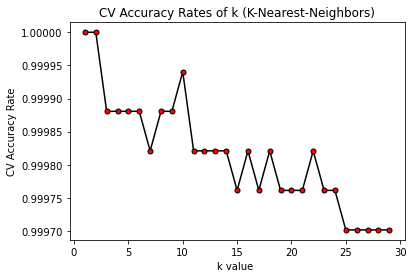

In [29]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='black',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [30]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index+1, 'accuracy = ', value)

best k =  1 accuracy =  1.0


In [31]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=6 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=6, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [32]:
X

array([[ 0.03680548,  0.04716466,  0.04473909, ..., -0.13886895,
         1.41706704, -1.41706704],
       [ 1.20120374,  0.71762706,  0.71350189, ..., -0.13886895,
         1.41706704, -1.41706704],
       [ 0.86498899, -0.65360378, -2.02470076, ..., -0.13886895,
         1.41706704, -1.41706704],
       ...,
       [-1.50620972, -1.27931105, -1.15045534, ..., -0.13886895,
        -0.70568292,  0.70568292],
       [-1.34695011, -1.71863743, -3.26184052, ..., -0.13886895,
        -0.70568292,  0.70568292],
       [ 1.0065531 ,  1.1303276 ,  1.05990102, ..., -0.13886895,
        -0.70568292,  0.70568292]])

In [33]:
X= sc.transform(X) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
best_knn.predict(X) 

array(['MFU student', 'MFU student', 'MFU student', ...,
       'Not MFU student', 'Not MFU student', 'Not MFU student'],
      dtype=object)

In [34]:
X_new=tcas
X_new

,Unnamed: 0,AcademicYear,PrefixName,Sex,FacultyName,DepartmentName,MajorName,EntryTypeName,TCAS,StudentType,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Status,GPAX
0,0,2562,MISS,Female,School of Liberal Arts,Thai Language and Culture for Foreigners,English,FOREIGNER,5,FOREIGN,3.281981,2.826382,3.004571,3.45754,MFU student,3.241106
1,1,2562,MISS,Female,School of Liberal Arts,English,English,QUOTA 17 NORTHERN PROVINCES,2,THAI,3.940000,3.330000,3.410000,3.86000,MFU student,3.610000
2,2,2562,MR.,Male,School of Liberal Arts,English,English,QUOTA 17 NORTHERN PROVINCES,2,THAI,3.750000,2.300000,1.750000,2.82000,MFU student,3.040000
3,3,2562,MISS,Female,School of Liberal Arts,English,English,DIRECT ADMISSION BY SCHOOL,1,THAI,4.000000,3.680000,3.910000,4.00000,MFU student,3.920000
4,4,2562,MISS,Female,School of Liberal Arts,English,English,DIRECT ADMISSION BY SCHOOL,1,THAI,3.910000,2.360000,3.250000,3.67000,MFU student,3.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16750,16750,2563,MISS,Female,School of Management,Tourism Management,English,DIRECT ADMISSION BY SCHOOL,5,THAI,2.460000,1.410000,2.750000,3.01000,Not MFU student,2.680000
16751,16751,2563,MISS,Female,School of Agro-industry,Posthavest Technology and Logistics,English,DIRECT ADMISSION BY SCHOOL,5,THAI,2.000000,2.170000,2.550000,2.78000,Not MFU student,2.900000
16752,16752,2563,MISS,Female,School of Management,Tourism Management,English,DIRECT ADMISSION BY SCHOOL,5,THAI,2.410000,1.830000,2.280000,3.19000,Not MFU student,2.640000
16753,16753,2563,MISS,Female,School of Management,Tourism Management,English,DIRECT ADMISSION BY SCHOOL,5,THAI,2.500000,1.500000,1.000000,2.50000,Not MFU student,2.960000


In [35]:
cat_data = pd.get_dummies(X_new[['Status']])
cat_data

,Status_MFU student,Status_Not MFU student
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
16750,0,1
16751,0,1
16752,0,1
16753,0,1


In [36]:
cat_data1 = pd.get_dummies(X_new[['PrefixName']])
cat_data1

,PrefixName_MISS,PrefixName_MR.,PrefixName_MRS.
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
16750,1,0,0
16751,1,0,0
16752,1,0,0
16753,1,0,0


In [37]:
cat_data2 = pd.get_dummies(X_new[['Sex']])
cat_data2

,Sex_Female,Sex_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
16750,1,0
16751,1,0
16752,1,0
16753,1,0


In [38]:
cat_data3 = pd.get_dummies(X_new[['FacultyName']])
cat_data3

,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Medicine,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16750,0,0,0,0,0,0,0,0,1,0,0,0,0,0
16751,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16752,0,0,0,0,0,0,0,0,1,0,0,0,0,0
16753,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
cat_data4 = pd.get_dummies(X_new[['DepartmentName']])
cat_data4

,DepartmentName_Accounting,DepartmentName_Applied Chemistry,DepartmentName_Applied Thai Traditional Medicine,DepartmentName_Aviation Business Management,DepartmentName_Beauty Technology,DepartmentName_Biotechnology,DepartmentName_Business Administration,DepartmentName_Business Chinese,DepartmentName_Chinese Language and Culture,DepartmentName_Chinese Study,...,DepartmentName_Physical Therapy,DepartmentName_Posthavest Technology and Logistics,DepartmentName_Public Health,DepartmentName_Software Engineering,DepartmentName_Sports and Health Science,DepartmentName_Teaching Chinese Language (4 Year),DepartmentName_Teaching Chinese Language (5 Year),DepartmentName_Thai Language and Culture for Foreigners,DepartmentName_Tourism Management,DepartmentName_Traditional Chinese Medicine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16751,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
cat_data5 = pd.get_dummies(X_new[['MajorName']])
cat_data5

,MajorName_Aviation Operations,MajorName_Aviation Services,MajorName_English,MajorName_International Aviation Logistics Business
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
16750,0,0,1,0
16751,0,0,1,0
16752,0,0,1,0
16753,0,0,1,0


In [41]:
cat_data6 = pd.get_dummies(X_new[['MajorName']])
cat_data6

,MajorName_Aviation Operations,MajorName_Aviation Services,MajorName_English,MajorName_International Aviation Logistics Business
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
16750,0,0,1,0
16751,0,0,1,0
16752,0,0,1,0
16753,0,0,1,0


In [42]:
cat_data6 = pd.get_dummies(X_new[['EntryTypeName']])
cat_data6

,EntryTypeName_CHIANG RAI DEVELOPMENT SCHOLARSHIP,EntryTypeName_DIRECT ADMISSION,EntryTypeName_DIRECT ADMISSION BY SCHOOL,EntryTypeName_DISABLE STUDENT,EntryTypeName_EP-MEP PROGRAM,EntryTypeName_FOREIGNER,EntryTypeName_GOOD BEHAVE STUDENTS,EntryTypeName_INTERNATIONAL SCHOOL,EntryTypeName_QUOTA 17 NORTHERN PROVINCES,EntryTypeName_QUOTA BY COMMUNITY HOSPITAL,EntryTypeName_QUOTA BY SCHOOL,EntryTypeName_QUOTA FOR SOUTHERN BORDER,EntryTypeName_RE-ID FIRST SEMESTER GPAX 2.00,EntryTypeName_SPECIAL FOR GOOD STUDENT,EntryTypeName_SPECIAL TALENT
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16750,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16751,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16752,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16753,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
cat_data7 = pd.get_dummies(X_new[['StudentType']])
cat_data7

,StudentType_FOREIGN,StudentType_THAI
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
16750,0,1
16751,0,1
16752,0,1
16753,0,1


In [44]:
X_new = X_new.drop(columns=['Status','PrefixName','Sex','FacultyName','DepartmentName','MajorName','EntryTypeName','StudentType'])
X_new

,Unnamed: 0,AcademicYear,TCAS,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX
0,0,2562,5,3.281981,2.826382,3.004571,3.45754,3.241106
1,1,2562,2,3.940000,3.330000,3.410000,3.86000,3.610000
2,2,2562,2,3.750000,2.300000,1.750000,2.82000,3.040000
3,3,2562,1,4.000000,3.680000,3.910000,4.00000,3.920000
4,4,2562,1,3.910000,2.360000,3.250000,3.67000,3.460000
...,...,...,...,...,...,...,...,...
16750,16750,2563,5,2.460000,1.410000,2.750000,3.01000,2.680000
16751,16751,2563,5,2.000000,2.170000,2.550000,2.78000,2.900000
16752,16752,2563,5,2.410000,1.830000,2.280000,3.19000,2.640000
16753,16753,2563,5,2.500000,1.500000,1.000000,2.50000,2.960000


In [48]:
X_new = pd.concat([cat_data, cat_data1,cat_data2,cat_data3,cat_data4,cat_data5,cat_data6,cat_data7,X_new], axis=1)
X_new

,Status_MFU student,Status_Not MFU student,PrefixName_MISS,PrefixName_MR.,PrefixName_MRS.,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,...,PrefixName_MR.,PrefixName_MRS.,Unnamed: 0,AcademicYear,TCAS,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,GPAX
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,2562,5,3.281981,2.826382,3.004571,3.45754,3.241106
1,1,0,1,0,0,1,0,0,0,0,...,0,0,1,2562,2,3.940000,3.330000,3.410000,3.86000,3.610000
2,1,0,0,1,0,0,1,0,0,0,...,1,0,2,2562,2,3.750000,2.300000,1.750000,2.82000,3.040000
3,1,0,1,0,0,1,0,0,0,0,...,0,0,3,2562,1,4.000000,3.680000,3.910000,4.00000,3.920000
4,1,0,1,0,0,1,0,0,0,0,...,0,0,4,2562,1,3.910000,2.360000,3.250000,3.67000,3.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16750,0,1,1,0,0,1,0,0,0,0,...,0,0,16750,2563,5,2.460000,1.410000,2.750000,3.01000,2.680000
16751,0,1,1,0,0,1,0,1,0,0,...,0,0,16751,2563,5,2.000000,2.170000,2.550000,2.78000,2.900000
16752,0,1,1,0,0,1,0,0,0,0,...,0,0,16752,2563,5,2.410000,1.830000,2.280000,3.19000,2.640000
16753,0,1,1,0,0,1,0,0,0,0,...,0,0,16753,2563,5,2.500000,1.500000,1.000000,2.50000,2.960000


In [49]:
X_new.columns

Index(['Status_MFU student', 'Status_Not MFU student', 'PrefixName_MISS',
       'PrefixName_MR.', 'PrefixName_MRS.', 'Sex_Female', 'Sex_Male',
       'FacultyName_School of Agro-industry',
       'FacultyName_School of Cosmetic Science',
       'FacultyName_School of Dentistry',
       'FacultyName_School of Health Science',
       'FacultyName_School of Information Technology',
       'FacultyName_School of Integrative Medicine',
       'FacultyName_School of Law', 'FacultyName_School of Liberal Arts',
       'FacultyName_School of Management', 'FacultyName_School of Medicine',
       'FacultyName_School of Nursing', 'FacultyName_School of Science',
       'FacultyName_School of Sinology',
       'FacultyName_School of Social Innovation', 'DepartmentName_Accounting',
       'DepartmentName_Applied Chemistry',
       'DepartmentName_Applied Thai Traditional Medicine',
       'DepartmentName_Aviation Business Management',
       'DepartmentName_Beauty Technology', 'DepartmentName_Biote